In [1]:
import h5py
import numpy as np

In [2]:
f_train_raw = h5py.File("../Data/train.h5", 'r')
f_test_raw = h5py.File("../Data/test.h5",'r')

X_train = f_train_raw['all_events']['hist'][:]
X_test = f_test_raw['all_events']['hist'][:]

y_train = f_train_raw['all_events']['y'][:]
y_test = f_test_raw['all_events']['y'][:]

weights_train = f_train_raw['all_events']['weight'][:]
weights_test = f_test_raw['all_events']['weight'][:]

In [12]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [5]:
print(np.log10(np.amax(weights_train)))
print(np.log10(np.amin(weights_train)))

9.771940064202349
-4.9167124306727175


In [6]:
print(np.amax(weights_train))
print(np.amin(weights_train))

5914800000.0
1.2114e-05


In [22]:
from sklearn.linear_model import RidgeClassifier

ridge_raw = RidgeClassifier(alpha=10)
#since = time.time()
ridge_raw.fit(X_train.reshape(X_train.shape[0],-1), y_train,sample_weight=np.log(weights_train+1))

RidgeClassifier(alpha=10, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [23]:
train_accuracy_raw = ridge_raw.score(X_train, y_train)
test_accuracy_raw = ridge_raw.score(X_test, y_test)
#score_time = time.time() - since
#print('Time for score: {:.4f} s'.format(score_time))
print('Train accuracy (%): {:.4f}'.format(train_accuracy_raw*100))
print('Test accuracy (%): {:.4f}'.format(test_accuracy_raw*100))

Train accuracy (%): 59.2841
Test accuracy (%): 58.9033


In [27]:
from sklearn import metrics
test_output = ridge_raw.decision_function(X_test)
fpr_raw, tpr_raw, thresholds = metrics.roc_curve(y_test,test_output)

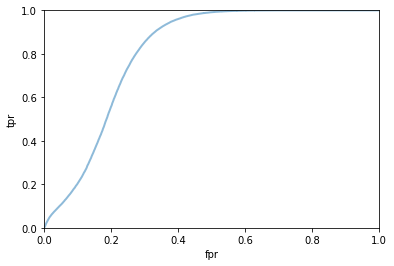

In [28]:
from matplotlib import pyplot
pyplot.plot(fpr_raw, tpr_raw, lw=2,alpha=0.5)
pyplot.axis((0,1,0,1))
pyplot.xlabel("fpr")
pyplot.ylabel("tpr")
pyplot.show()

In [26]:
np.save("../Results/FINAL_Thesis_result_linear_classifier_on_raw_data_result",test_output)